In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
import matplotlib as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# 1. Use the “pima-indians-diabetes.csv” dataset and note down the meta information.

 ###  1. Title: Pima Indians Diabetes Database

 
### 2. Sources:

    (a) Original owners: National Institute of Diabetes and Digestive and

                         Kidney Diseases

    (b) Donor of database: Vincent Sigillito (vgs@aplcen.apl.jhu.edu)

                           Research Center, RMI Group Leader

                           Applied Physics Laboratory

                           The Johns Hopkins University

                           Johns Hopkins Road

                           Laurel, MD 20707

                           (301) 953-6231

    (c) Date received: 9 May 1990

 

### 3. Past Usage:

     1. Smith,~J.~W., Everhart,~J.~E., Dickson,~W.~C., Knowler,~W.~C., \&

        Johannes,~R.~S. (1988). Using the ADAP learning algorithm to forecast

        the onset of diabetes mellitus.  In {\it Proceedings of the Symposium

        on Computer Applications and Medical Care} (pp. 261--265).  IEEE

        Computer Society Press.

 

        The diagnostic, binary-valued variable investigated is whether the

        patient shows signs of diabetes according to World Health Organization

        criteria (i.e., if the 2 hour post-load plasma glucose was at least 

        200 mg/dl at any survey  examination or if found during routine medical

        care).   The population lives near Phoenix, Arizona, USA.

 

        Results: Their ADAP algorithm makes a real-valued prediction between

        0 and 1.  This was transformed into a binary decision using a cutoff of 

        0.448.  Using 576 training instances, the sensitivity and specificity

        of their algorithm was 76
 

### 4. Relevant Information:

       Several constraints were placed on the selection of these instances from

       a larger database.  In particular, all patients here are females at

       least 21 years old of Pima Indian heritage.  ADAP is an adaptive learning

       routine that generates and executes digital analogs of perceptron-like

       devices.  It is a unique algorithm; see the paper for details.

 

### 5. Number of Instances: 768

 

### 6. Number of Attributes: 8 plus class 

 

### 7. For Each Attribute: (all numeric-valued)

    1. Number of times pregnant

    2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test

    3. Diastolic blood pressure (mm Hg)

    4. Triceps skin fold thickness (mm)

    5. 2-Hour serum insulin (mu U/ml)

    6. Body mass index (weight in kg/(height in m)^2)

    7. Diabetes pedigree function

    8. Age (years)

    9. Class variable (0 or 1)

 

### 8. Missing Attribute Values: None

 

### 9. Class Distribution: (class value 1 is interpreted as "tested positive for

    diabetes")

 

    Class Value  Number of instances

    0            500

    1            268

 

### 10. Brief statistical analysis:

 

     Attribute number:    Mean:   Standard Deviation:

     1.                     3.8     3.4

     2.                   120.9    32.0

     3.                    69.1    19.4

     4.                    20.5    16.0

     5.                    79.8   115.2

     6.                    32.0     7.9

     7.                     0.5     0.3

     8.                    33.2    11.8


### Relabeled values in attribute 'class'

    From: 0                       To: tested_negative     

    From: 1                       To: tested_positive


# 2. Compute mean & standard deviation , tabulate and visualize the age of the patients.

In [3]:
print('Mean of age: ', df['Age'].mean())
print('Standard Deviation of age: ', df['Age'].std())

Mean of age:  33.240885416666664
Standard Deviation of age:  11.760231540678685


<AxesSubplot:xlabel='Age', ylabel='Density'>

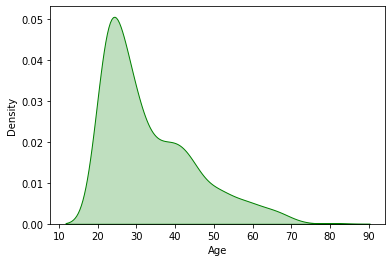

In [4]:
sns.kdeplot(data = df.Age, color = 'green', shade = True)

# 3. Analyze and tabulate the relationship of age, BMI of patients with respect to the class.

In [5]:
pd.crosstab([df['Age'],df['BMI']], df['Outcome'])

Outcome   0  1
Age BMI       
21  0.0   3  0
    18.2  2  0
    19.1  1  0
    21.0  1  0
    21.8  2  0
...      .. ..
69  0.0   1  0
    26.8  1  0
70  32.5  0  1
72  19.6  1  0
81  25.9  1  0

[708 rows x 2 columns]

# 4. Tabulate the class label and comment on whether the classes are balanced.

In [6]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

>We can clearly see that the classes are not balanced and the number of patients who tested positive are almost double of the number of patients who tested negative. 

# 5. Use the data set to build a logistic regression model (using sklearn) and predict the class label. Divide the dataset into training and test set (70,30) using train_test_split method in sklearn. 

In [7]:
x = df.drop(['Outcome'], axis=1)
y = df['Outcome']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

regr = LogisticRegression().fit(x_train, y_train)
y_pred = regr.predict(x_test)

c:\Users\91704\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# 6. Use the test data set and evaluate the performance using a confusion matrix. Visualize the confusion matrix using a heat map

[[137  18]
 [ 32  44]]


<AxesSubplot:>

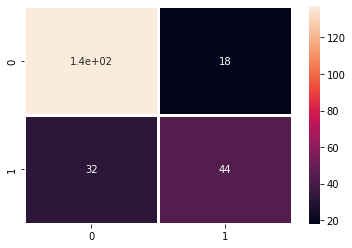

In [8]:
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)
tn, fp, fn, tp = conf_matrix.ravel()
sns.heatmap(conf_matrix, annot=True, linewidth=3)

# 7. Compute accuracy rate, true positive and true negative rate and comment on the performance.

In [9]:
print('Accuracy of the logistic regression model is', accuracy_score(y_test, y_pred)*100,'%')
print('True Positive rate: ', str(tp*100/(tp+fn)), '%')
print('True Negative rate: ', str(tn*100/(tn+fp)), '%')

Accuracy of the logistic regression model is 78.35497835497836 %
True Positive rate:  57.89473684210526 %
True Negative rate:  88.38709677419355 %


# 8. Visualize the ROC curve, and comment on the performance of the classifier.

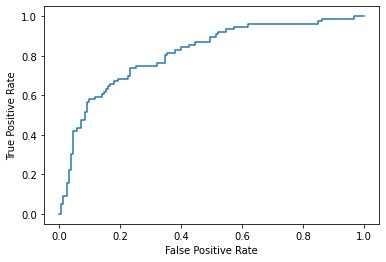

In [10]:
y_pred_proba = regr.predict_proba(x_test)[::, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
plt.pyplot.plot(fpr,tpr)
plt.pyplot.ylabel('True Positive Rate')
plt.pyplot.xlabel('False Positive Rate')
plt.pyplot.show()